# Deep Learning Classification problem

In [27]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from scipy import interp
from keras.models import Sequential
from keras.layers import Dense
from itertools import cycle

In [2]:
X, y = make_classification(n_samples=80000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [3]:
X

array([[-0.46169967,  1.64167921,  1.12324459, ..., -1.83434204,
         0.27795065,  0.38715606],
       [-0.33159717, -0.5796234 , -0.28423447, ..., -0.37267566,
        -0.87160315, -0.36674339],
       [-1.15629963,  0.05847129, -0.09684014, ..., -1.08414824,
         1.83943886, -1.79600065],
       ...,
       [-0.81094262, -0.71486267,  0.92387511, ...,  0.64623497,
        -0.36797877,  0.68141509],
       [ 1.78905001, -1.36735325, -1.44013285, ..., -0.96590277,
        -0.84161876,  1.43080264],
       [-0.11705161,  0.27905536, -0.28864878, ..., -0.01055292,
         0.03027016, -0.90937905]])

In [4]:
y

array([0, 1, 1, ..., 0, 0, 0])

# Binary classifier

In [5]:
# Binary classifier
def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=20, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [6]:
# from keras.wrappers.scikit_learn import KerasClassifier
keras_model = build_model()
keras_model.fit(X_train, y_train, epochs=5, batch_size=100, verbose=1)

Epoch 1/5
40000/40000 [==============================] - 4s 94us/step - loss: 0.3336 - acc: 0.8479
Epoch 2/5
40000/40000 [==============================] - 1s 33us/step - loss: 0.2353 - acc: 0.8930
Epoch 3/5
40000/40000 [==============================] - 1s 34us/step - loss: 0.2163 - acc: 0.9090
Epoch 4/5
40000/40000 [==============================] - 2s 38us/step - loss: 0.1995 - acc: 0.9202
Epoch 5/5
40000/40000 [==============================] - 1s 34us/step - loss: 0.1883 - acc: 0.9275


In [7]:
# To plot the roc curve, we import roc_curve class and pull FP and TP

In [8]:
from sklearn.metrics import roc_curve
y_pred_keras = keras_model.predict(X_test).ravel()  # ravel() Return a contiguous flattened array.
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
# For plots we need this fpr_keras, tpr_keras, thresholds_keras

In [9]:
# AUC can be calculated like this

In [10]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras    # wow... 0.97. Very good.

0.979938023533506

# Let's train same date with another classifier like Random Forest to compare

In [12]:
from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)
# For plots we need this fpr_keras, tpr_keras, thresholds_keras

In [13]:
# Now let's plot an compare

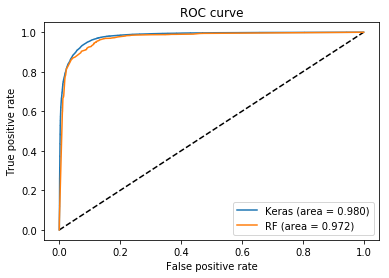

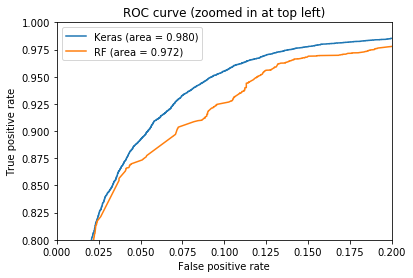

In [14]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()


# categorical_crossentropy classifier.

In [16]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
# 3 classes to classify
n_classes = 3

X, y = make_classification(n_samples=80000, n_features=20, n_informative=3, n_redundant=0, n_classes=n_classes,
    n_clusters_per_class=2)
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [17]:
X

array([[-1.13203926,  1.05220774, -2.15301956, ..., -0.28246474,
        -1.79652701,  0.5639972 ],
       [ 0.049461  ,  0.15688308,  0.22189249, ..., -1.05035623,
        -0.57942165,  0.30485197],
       [-2.66157451, -0.5015422 , -0.72938799, ...,  0.67175477,
        -0.26366302, -0.68025566],
       ...,
       [ 0.28185913, -1.0089129 ,  0.75049279, ..., -0.45084024,
        -0.41088234,  0.58574307],
       [-0.87795849, -1.40111983,  0.27904624, ..., -1.28687686,
        -0.64847818, -1.11159924],
       [-0.87729932,  0.29267579, -1.18599423, ...,  0.04893428,
        -1.38624625, -0.25833205]])

In [18]:
y   # Ok, now we have 3x class

array([[1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [19]:
def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=20, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

keras_model2 = build_model()
keras_model2.fit(X_train, y_train, epochs=10, batch_size=100, verbose=1)

Epoch 1/10
40000/40000 [==============================] - 2s 56us/step - loss: 0.6839 - acc: 0.7048
Epoch 2/10
40000/40000 [==============================] - 2s 46us/step - loss: 0.3906 - acc: 0.8646
Epoch 3/10
40000/40000 [==============================] - 2s 39us/step - loss: 0.3208 - acc: 0.8926
Epoch 4/10
40000/40000 [==============================] - 2s 39us/step - loss: 0.2851 - acc: 0.9028
Epoch 5/10
40000/40000 [==============================] - 2s 38us/step - loss: 0.2626 - acc: 0.9082
Epoch 6/10
40000/40000 [==============================] - 2s 38us/step - loss: 0.2464 - acc: 0.9136
Epoch 7/10
40000/40000 [==============================] - 2s 39us/step - loss: 0.2342 - acc: 0.9198
Epoch 8/10
40000/40000 [==============================] - 2s 38us/step - loss: 0.2243 - acc: 0.9245
Epoch 9/10
40000/40000 [==============================] - 2s 38us/step - loss: 0.2168 - acc: 0.9285
Epoch 10/10
40000/40000 [==============================] - 2s 41us/step - loss: 0.2108 - acc: 0.9318

# Here is the code to plot those ROC curves along with AUC values.

In [20]:
y_score = keras_model2.predict(X_test)  # ravel() Return a contiguous flattened array.

# Plot linewidth.
lw = 2
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Compute macro-average ROC curve and ROC area

In [25]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

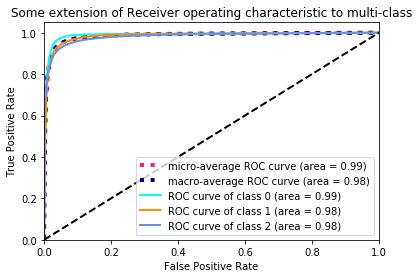

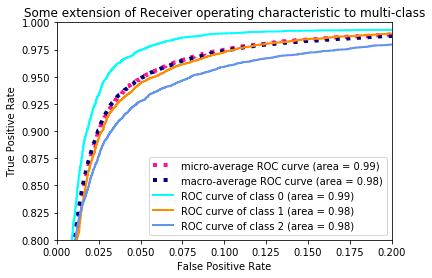

In [28]:
# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()